## Business Context

This project aims to perform **customer segmentation** using transactional retail data.
The goal is to identify distinct customer groups based on purchasing behavior to support
marketing, retention, and personalization strategies.

This is an **unsupervised learning** problem, as no target labels are provided.


In [1]:
from pathlib import Path

FIGURES_PATH = Path("../reports/figures")
FIGURES_PATH.mkdir(parents=True, exist_ok=True)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('../data/raw/online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df['InvoiceNo'].duplicated().sum()

np.int64(516009)

In [7]:
df['InvoiceNo'].str.startswith("C").sum()

np.int64(9288)

<Axes: ylabel='Quantity'>

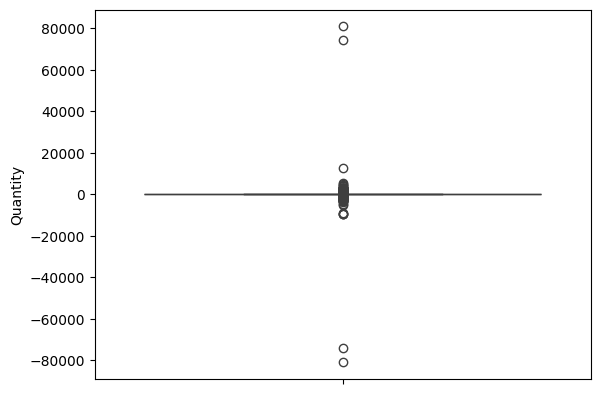

In [8]:
sns.boxplot(df['Quantity'])

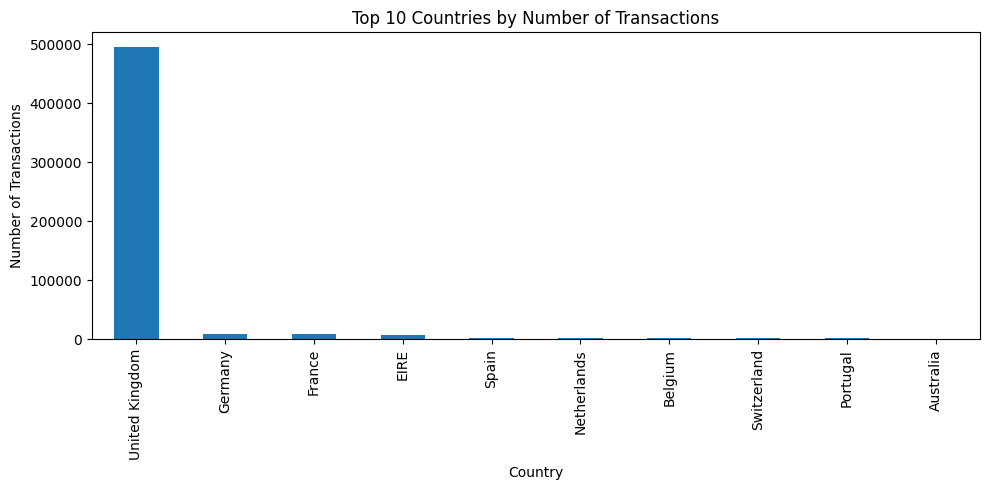

In [9]:
country_counts=df['Country'].value_counts()
top_countries=country_counts.head(10).astype(int)


plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Number of Transactions")
plt.ylabel("Number of Transactions")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig(FIGURES_PATH/ "Top 10 Countries in Transaction.png" ,dpi=300,bbox_inches='tight')
plt.show()

## EDA Summary

During the Exploratory Data Analysis (EDA) phase, the dataset was thoroughly examined to
understand the structure, data types, and overall data quality.

Each column was analyzed to identify its purpose, data type, and potential issues.
It was observed that approximately **25% of the records contain missing values in
the CustomerID column**. Since customer segmentation requires identifying unique
customers, the presence of CustomerID is mandatory, and these records will be removed
during preprocessing.

The analysis also revealed that **9,288 out of 541,909 invoices are cancelled transactions**,
which can be identified by InvoiceNo values starting with the letter **“C”**.
These records represent returns rather than actual purchases and will be excluded
to ensure meaningful behavioral analysis.

Additionally, inconsistencies were detected in the **Quantity** and **UnitPrice**
columns, including negative values that do not represent valid retail transactions.
The **InvoiceDate** column was found to be stored as an object rather than a datetime type,
which will be corrected to enable time-based feature engineering.

Finally, the dataset includes transactions from multiple countries, with the
**United Kingdom dominating the dataset**. To reduce geographical bias and ensure
consistent purchasing behavior, the analysis will focus exclusively on the UK market.

Overall, this EDA phase provided critical insights that guide the preprocessing
and feature engineering steps required for effective customer segmentation.
